In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox, het_arch

In [50]:
from arch import arch_model

In [5]:
from matplotlib import rcParams
rcParams['figure.figsize'] = [12, 8]

In [2]:
%matplotlib inline

In [3]:
da = pd.read_csv('data/Chapter 3/m-intc7308.txt', sep='\s+')

In [4]:
intc = np.log(da['rtn'] + 1)

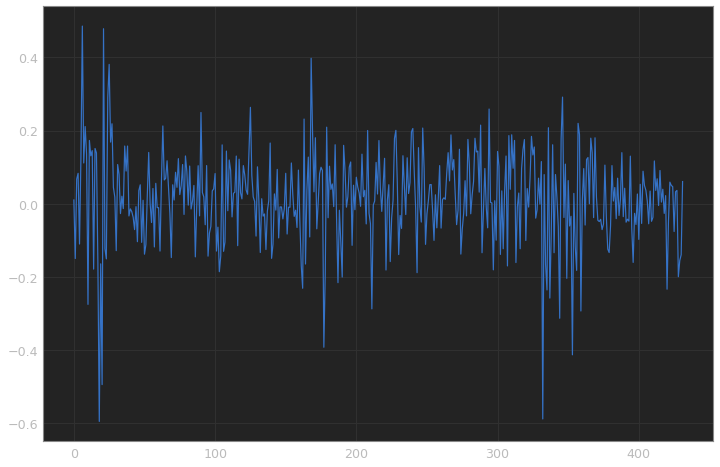

In [6]:
plt.plot(intc)

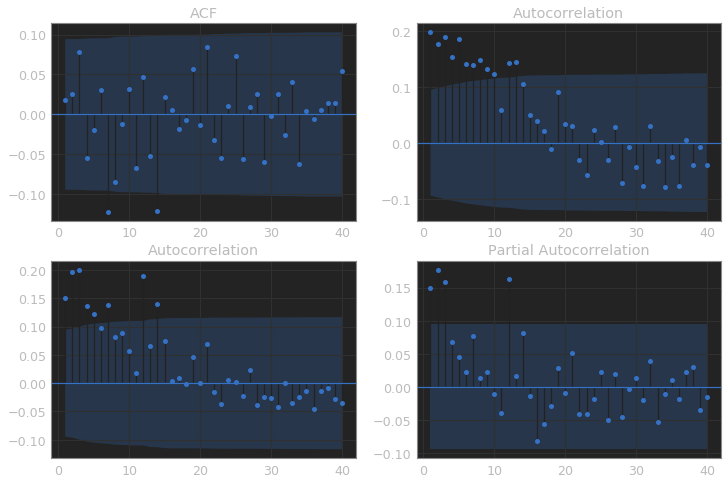

In [49]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
fig = plot_acf(intc, ax=ax1, lags=40, title='ACF', zero=False)

ax2 = fig.add_subplot(223)
fig = plot_acf(np.power(intc, 2), ax=ax2, lags=40, zero=False)

ax3 = fig.add_subplot(222)
fig = plot_acf(np.abs(intc), ax=ax3, lags=40, zero=False)

ax4 = fig.add_subplot(224)
fig = plot_pacf(np.power(intc, 2), ax=ax4, lags=40, zero=False)

In [28]:
acorr_ljungbox(intc, lags=12)

(array([  0.14899644,   0.44211648,   3.15013763,   4.48091098,
          4.64071967,   5.06783829,  11.65031444,  14.79446048,
         14.8600812 ,  15.29725088,  17.30162525,  18.26346254]),
 array([ 0.69949624,  0.80166999,  0.36905114,  0.34481695,  0.46127915,
         0.5351423 ,  0.1126609 ,  0.06326744,  0.09485171,  0.12159458,
         0.09926479,  0.10792192]))

In [32]:
het_arch(intc, maxlag=12)

(53.619728804108483,
 3.1948339464276622e-07,
 4.9637019555391548,
 1.0735874852455839e-07)

### Page 100

In [43]:
da = np.loadtxt('data/Chapter 3/exch-perc.txt')

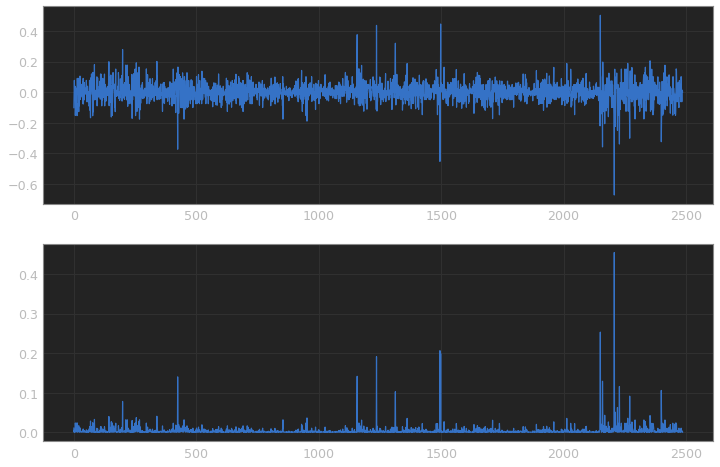

In [39]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(da)

ax2 = fig.add_subplot(212)
ax2.plot(np.power(da, 2))

### 101

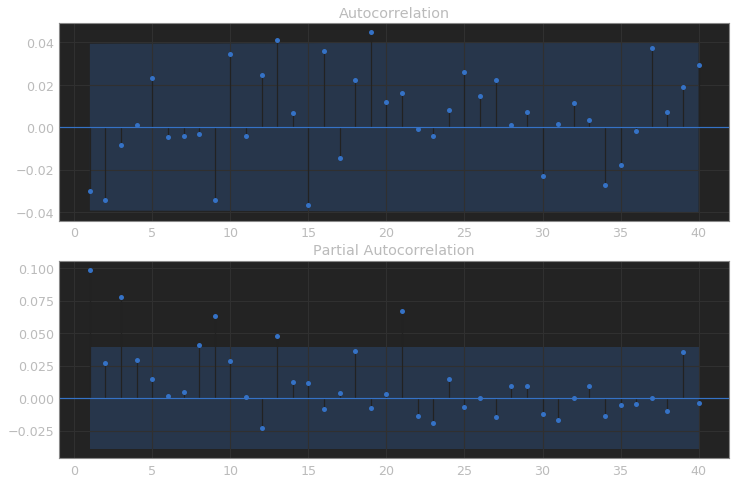

In [47]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = plot_acf(da, ax=ax1, lags=40, zero=False)

ax2 = fig.add_subplot(212)
fig = plot_pacf(np.power(da, 2), ax=ax2, lags=40, zero=False)

In [53]:
am = arch_model(intc, )

In [58]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: -300.333963975
Iteration:      2,   Func. Count:     17,   Neg. LLF: -300.460547869
Iteration:      3,   Func. Count:     26,   Neg. LLF: -300.531997372
Iteration:      4,   Func. Count:     33,   Neg. LLF: -301.05730652
Iteration:      5,   Func. Count:     40,   Neg. LLF: -301.632547662
Iteration:      6,   Func. Count:     47,   Neg. LLF: -301.928968184
Iteration:      7,   Func. Count:     54,   Neg. LLF: -302.15847838
Iteration:      8,   Func. Count:     61,   Neg. LLF: -302.327237011
Iteration:      9,   Func. Count:     67,   Neg. LLF: -302.369462984
Iteration:     10,   Func. Count:     73,   Neg. LLF: -302.441526836
Iteration:     11,   Func. Count:     79,   Neg. LLF: -302.446931945
Iteration:     12,   Func. Count:     85,   Neg. LLF: -302.447273531
Iteration:     13,   Func. Count:     91,   Neg. LLF: -302.447338488
Iteration:     14,   Func. Count:     97,   Neg. LLF: -302.447340657
Optimization terminated successfully

In [59]:
res.summary

<bound method ARCHModelResult.summary of                      Constant Mean - GARCH Model Results                      
Dep. Variable:                    rtn   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:                302.447
Distribution:                  Normal   AIC:                          -596.895
Method:            Maximum Likelihood   BIC:                          -580.621
                                        No. Observations:                  432
Date:                Mon, Dec 04 2017   Df Residuals:                      428
Time:                        16:10:57   Df Model:                            4
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            

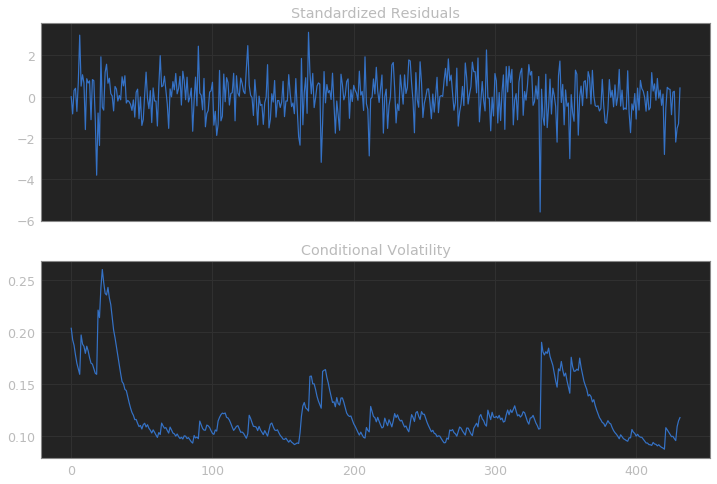

In [63]:
fig = res.plot()